<a href="https://colab.research.google.com/github/Mohammedaslaan/DataScience/blob/main/TitanicDataSetAnalysisFull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
x = df[['pclass','sex','age']]
y = df['survived']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
x['sex'] = le.fit_transform(x['sex'])

<ipython-input-6-b916ec63b458>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sex'] = le.fit_transform(x['sex'])


In [ ]:
x.fillna(method='pad',inplace=True)

<ipython-input-7-81d21250d8cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna(method='pad',inplace=True)


In [ ]:
set(y)

{0, 1}

In [ ]:
np.unique(y)

array([0, 1])

<AxesSubplot:xlabel='survived', ylabel='count'>

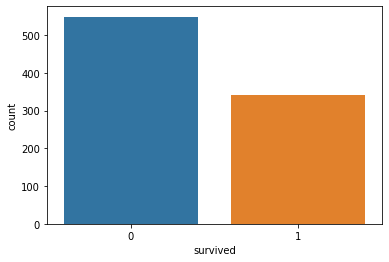

In [ ]:
sns.countplot(x=y)

<AxesSubplot:xlabel='sex', ylabel='survived'>

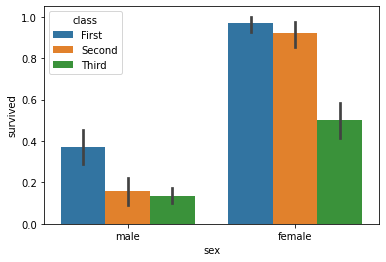

In [ ]:
sns.barplot(x='sex',y='survived',data=df,hue='class')

In [ ]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [ ]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='survived'>

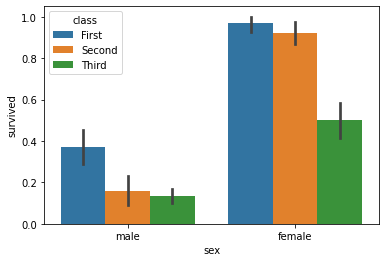

In [ ]:
sns.barplot(x='sex',y='survived',data=df,hue='class')

In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled

array([[ 0.82737724,  0.73769513, -0.52119766],
       [-1.56610693, -1.35557354,  0.57872934],
       [ 0.82737724, -1.35557354, -0.24621591],
       ...,
       [ 0.82737724, -1.35557354, -0.72743397],
       [-1.56610693,  0.73769513, -0.24621591],
       [ 0.82737724,  0.73769513,  0.16625671]])

In [ ]:
pd.DataFrame(x_scaled).describe()


,0,1,2
count,8.910000e+02,8.910000e+02,8.910000e+02
mean,-8.772133e-17,-1.156327e-16,1.634807e-16
std,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-1.355574e+00,-2.004724e+00
25%,-3.693648e-01,-1.355574e+00,-6.586885e-01
50%,8.273772e-01,7.376951e-01,-1.087250e-01
75%,8.273772e-01,7.376951e-01,5.787293e-01
max,8.273772e-01,7.376951e-01,3.466038e+00


In [ ]:
x_scaled.shape

(891, 3)

In [ ]:
# Cross- Validation
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x_scaled,y,random_state = 0,test_size = 0.25)

In [ ]:
x_train.shape

(668, 3)

In [ ]:
x_test.shape

(223, 3)

In [ ]:
#Build the model
from sklearn.linear_model import LogisticRegression           # to find probability-logistic regression

In [ ]:
#create the object
clf = LogisticRegression()

In [ ]:
#Train the algorithm
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [ ]:
result = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred
})

In [ ]:
result.shape

(223, 2)

In [ ]:
sample = pd.DataFrame({
    'actual':[1,0,0,1,1,0,1,0,1,1],
    'predicted': [1,1,0,1,0,0,1,0,1,0]
})

In [ ]:
sample

,actual,predicted
0,1,1
1,0,1
2,0,0
3,1,1
4,1,0
5,0,0
6,1,1
7,0,0
8,1,1
9,1,0


In [ ]:
p = sample['actual'] == sample['predicted']

In [ ]:
p.sum()

7

In [ ]:
len(sample)

10

In [ ]:
result

,actual,predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
167,0,0
306,1,1
379,0,0
742,1,1


In [ ]:
sum(result['actual'] == result['predicted']) / len(result)

0.7802690582959642

In [ ]:
x.columns

Index(['pclass', 'sex', 'age'], dtype='object')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
new1= [[1,1,35]]

In [ ]:
clf.predict_proba(new1)

array([[9.99999976e-01, 2.40941583e-08]])

In [ ]:
new1 = scaler.transform(new1)

In [ ]:

clf.predict_proba(new1)

array([[0.57845435, 0.42154565]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.7802690582959642